In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dog vs Cat Dataset from Kaggle

In [3]:
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:02<00:00, 225MB/s]
100% 812M/812M [00:02<00:00, 290MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
#extracting zip files
from zipfile import ZipFile
dataset = "/content/dogs-vs-cats.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [6]:
from zipfile import ZipFile
dataset = "/content/train.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [7]:
import os
#counting no. of files in train directory
path, dirs, files = next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


Printing names of files

In [8]:
file_names = os.listdir("/content/train")
print(file_names)

['dog.542.jpg', 'cat.7578.jpg', 'cat.6461.jpg', 'cat.1154.jpg', 'dog.3894.jpg', 'dog.6788.jpg', 'dog.5233.jpg', 'dog.11464.jpg', 'dog.10057.jpg', 'dog.6144.jpg', 'dog.6739.jpg', 'cat.10569.jpg', 'dog.5660.jpg', 'cat.6282.jpg', 'dog.4646.jpg', 'cat.4880.jpg', 'dog.11118.jpg', 'cat.2595.jpg', 'cat.4784.jpg', 'dog.8651.jpg', 'cat.7420.jpg', 'dog.7554.jpg', 'cat.11021.jpg', 'dog.4389.jpg', 'cat.3631.jpg', 'dog.4388.jpg', 'dog.2574.jpg', 'dog.10393.jpg', 'dog.10559.jpg', 'dog.11072.jpg', 'cat.534.jpg', 'cat.447.jpg', 'dog.5779.jpg', 'cat.12247.jpg', 'dog.11751.jpg', 'dog.11583.jpg', 'cat.9759.jpg', 'dog.3494.jpg', 'cat.6192.jpg', 'dog.3491.jpg', 'dog.4018.jpg', 'cat.2792.jpg', 'cat.2194.jpg', 'dog.6376.jpg', 'cat.11742.jpg', 'cat.8428.jpg', 'dog.12434.jpg', 'cat.8950.jpg', 'cat.1887.jpg', 'dog.10341.jpg', 'dog.7565.jpg', 'cat.3624.jpg', 'cat.4087.jpg', 'dog.11468.jpg', 'dog.5241.jpg', 'dog.3983.jpg', 'dog.10243.jpg', 'cat.1088.jpg', 'cat.11984.jpg', 'cat.320.jpg', 'cat.4814.jpg', 'dog.5045.

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the Images

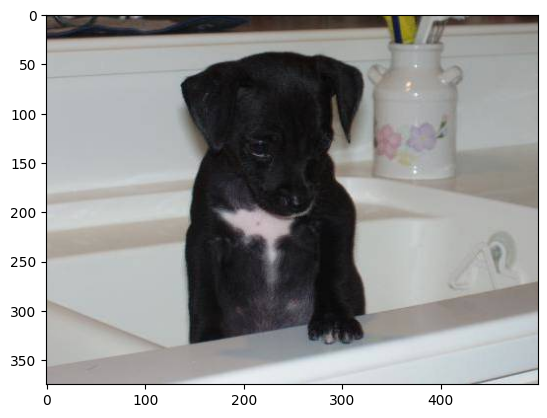

In [10]:
img = mpimg.imread("/content/train/dog.8298.jpg")
imgplot = plt.imshow(img)
plt.show()

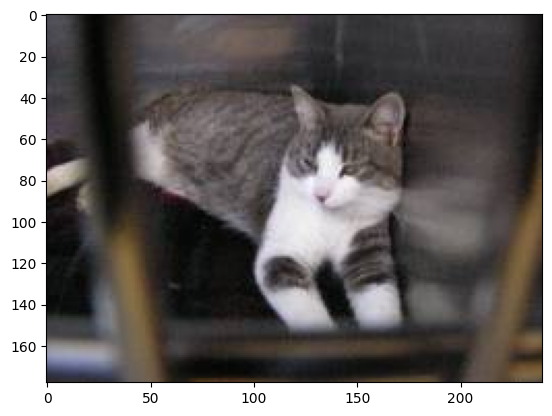

In [11]:
img = mpimg.imread("/content/train/cat.4277.jpg")
imgplot = plt.imshow(img)
plt.show()

In [12]:
files = ['dog' if 'dog' in filename else 'cat' for filename in os.listdir('/content/train')]

In [13]:
files.count('dog')

12500

In [14]:
files.count('cat')

12500

In [15]:
print('No. of Dog Images ',files.count('dog'))
print('No. of Cat Images ',files.count('cat'))

No. of Dog Images  12500
No. of Cat Images  12500


Resizing all the Images

In [16]:
os.mkdir('/content/image resized')

In [17]:
original_folder = '/content/train'
resized_folder = '/content/image resized'
for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder + '/' + filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImagePath = resized_folder+'/'+filename
  img.save(newImagePath)

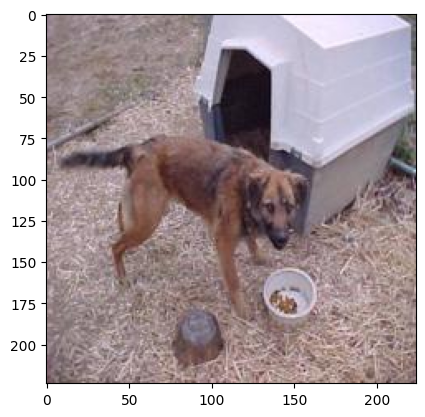

In [22]:
#displaying resized images
img = mpimg.imread("/content/image resized/dog.542.jpg")
imgplot = plt.imshow(img)
plt.show()

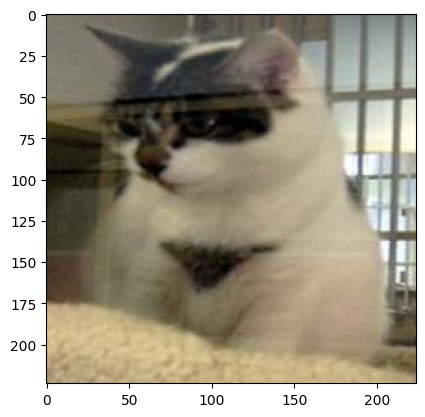

In [23]:
#displaying resized images
img = mpimg.imread("/content/image resized/cat.7578.jpg")
imgplot = plt.imshow(img)
plt.show()

Creating Labels for resized images

Cat --> 0

Dog --> 1

In [24]:
#creating a for loop to assign labels
filenames = os.listdir('/content/image resized')
labels = []
for i in range(2000):
  file_name= filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [25]:
#counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

[0 1] [ 998 1002]


Converting all the resized imagesto numpy arrays

In [26]:
import cv2
import glob

In [27]:
image_directory = '/content/image resized/'
image_extention = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extention]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [28]:
print(dog_cat_images)

[[[[144 130 148]
   [137 125 143]
   [135 123 141]
   ...
   [ 88 103 105]
   [ 78  96  97]
   [ 81  99 100]]

  [[138 124 142]
   [138 126 144]
   [143 131 149]
   ...
   [ 89 102 104]
   [ 93 106 108]
   [ 89 102 104]]

  [[133 119 137]
   [140 128 146]
   [151 139 157]
   ...
   [ 85  93  93]
   [ 88  96  96]
   [ 89  97  97]]

  ...

  [[ 91  84 111]
   [ 89  83 108]
   [100  94 119]
   ...
   [134 132 154]
   [134 131 153]
   [140 137 159]]

  [[102  95 122]
   [ 96  90 115]
   [103  97 122]
   ...
   [120 118 140]
   [100  97 119]
   [104 101 123]]

  [[105  98 125]
   [ 82  76 101]
   [ 90  84 109]
   ...
   [ 79  77  99]
   [ 73  70  92]
   [113 110 132]]]


 [[[100 117 120]
   [102 119 122]
   [105 122 125]
   ...
   [135 135 123]
   [139 136 122]
   [138 135 121]]

  [[104 121 124]
   [105 122 125]
   [105 122 125]
   ...
   [136 136 124]
   [140 137 123]
   [139 136 122]]

  [[105 122 125]
   [105 122 125]
   [104 121 124]
   ...
   [138 138 126]
   [142 139 125]
   [141 138

In [29]:
type(dog_cat_images)

numpy.ndarray

In [30]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [31]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [34]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [35]:
print(X_train_scaled)

[[[[0.         0.         0.05098039]
   [0.         0.00784314 0.0745098 ]
   [0.02745098 0.05490196 0.12156863]
   ...
   [0.41568627 0.54901961 0.61176471]
   [0.41568627 0.54901961 0.61176471]
   [0.41568627 0.54901961 0.61176471]]

  [[0.03921569 0.06666667 0.13333333]
   [0.03137255 0.05882353 0.1254902 ]
   [0.02745098 0.05490196 0.12156863]
   ...
   [0.41568627 0.54901961 0.61176471]
   [0.41568627 0.54901961 0.61176471]
   [0.41568627 0.54901961 0.61176471]]

  [[0.03137255 0.05882353 0.1254902 ]
   [0.01176471 0.03921569 0.10588235]
   [0.         0.02352941 0.09019608]
   ...
   [0.41568627 0.54901961 0.61176471]
   [0.41568627 0.54901961 0.61176471]
   [0.41568627 0.54901961 0.61176471]]

  ...

  [[0.34901961 0.38823529 0.38823529]
   [0.40784314 0.44705882 0.44705882]
   [0.43137255 0.47058824 0.47058824]
   ...
   [0.21960784 0.2        0.19607843]
   [0.21176471 0.19215686 0.18823529]
   [0.20392157 0.18431373 0.18039216]]

  [[0.27843137 0.3254902  0.3254902 ]
   [0.2

Building the Neural Network

In [36]:
import tensorflow as tf
import tensorflow_hub as hub

In [37]:
mobilenet_model = 'https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [42]:
#error in compilation
# num_of_classes = 2

# model = tf.keras.Sequential([
#     pretrained_model,
#     tf.keras.layers.Dense(num_of_classes)
# ])

# model.build((None, 224, 224, 3))
# model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7b5169b03dd0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [50]:
from tensorflow.keras.applications import MobileNetV2

# Load a pre-trained MobileNetV2 model without the top classification layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
base_model.trainable = False

# Build a new model on top of the pre-trained base
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # Add this layer to reduce dimensions
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Compiling the Model

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8670 - loss: 0.2993
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9607 - loss: 0.0906
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9791 - loss: 0.0724
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9830 - loss: 0.0508
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9862 - loss: 0.0414


In [53]:
score, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Loss:', score)
print('Test Accuracy:', accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9782 - loss: 0.0610
Test Loss: 0.06167593598365784
Test Accuracy: 0.9750000238418579
